*Supporting textbook chapters for week 8: Chapters 9.1, 9.2, 9.3.1*

Lecture 8, topics:
* Classifying PDEs
* Elliptic equation solvers: Jacobi, Gauss-Seidel, overrelaxation
* Parabolic equation solver: FTCS (Forward Time, Centered Space)
* Stability.

# Intro

## Classifying PDEs

Recall conical equations in geometry:
$$ \alpha x^2 + \beta xy + \gamma y^2 + \delta x + \varepsilon y = f, $$
classified using 
$$ \Delta = \beta^2 - 4\alpha\gamma.$$

1. $\Delta = 0$: equation for a parabola,
3. $\Delta < 0$: equation for an ellipse,
2. $\Delta > 0$: equation for a hyperbola.

![By Pbroks13 [CC BY 3.0  (https://creativecommons.org/licenses/by/3.0)], from Wikimedia Commons](500px-Conic_sections_with_plane.png)

Recall conical equations in geometry:
$$ \alpha x^2 + \beta xy + \gamma y^2 + \delta x + \varepsilon y = f, $$
classified using 
$$ \Delta = \beta^2 - 4\alpha\gamma.$$

What does it have to do with PDEs?
$$ \alpha\frac{\partial^2 \phi}{\partial x^2} + \beta\frac{\partial^2 \phi}{\partial x\partial y} + \gamma\frac{\partial^2 \phi}{\partial y^2} + \delta \frac{\partial\phi}{\partial x} + \varepsilon\frac{\partial\phi}{\partial y} = f.$$

Imagine Fourier modes to convince yourself of the connection:
$$\binom{\phi}{f} = \binom{\Phi}{F}\text e^{i(kx + \ell y)}\Rightarrow -\alpha k^2 - \beta k\ell - \gamma \ell^2 + i\delta k +  i\varepsilon\ell = \frac{F}\Phi.$$
$$\Rightarrow (x, y) \leftrightarrow (ik, i\ell)$$


What does it have to do with PDEs?
$$ \alpha\frac{\partial^2 \phi}{\partial x^2} + \beta\frac{\partial^2 \phi}{\partial x\partial y} + \gamma\frac{\partial^2 \phi}{\partial y^2} + \delta\frac{\partial\phi}{\partial x} +  \varepsilon\frac{\partial\phi}{\partial y} = f.$$

With $\Delta = \beta^2 - 4\alpha\gamma$,
1. $\Delta = 0$: parabolic PDE,
3. $\Delta < 0$: elliptic PDE,
2. $\Delta > 0$: hyperbolic PDE.

1. Canonical parabolic PDE: the diffusion equation, $\ \displaystyle \kappa \nabla^2 \phi  - \frac{\partial T}{\partial t} = 0$,
    $$x\to x,\quad y\to t,\quad \alpha \to \kappa,\quad \varepsilon \to - 1,\quad \beta, \gamma, \delta, f \to 0 \quad\Rightarrow\quad \beta^2 - 4\alpha\gamma = 0.$$
3. Canonical elliptic PDE: the Poisson equation, $\ \nabla^2 \phi = \rho$,
    $$x\to x,\quad y\to y,\quad\alpha, \gamma \to 1,\quad f \to \rho,\quad \beta, \delta, \varepsilon \to 0 \quad\Rightarrow\quad \beta^2 - 4\alpha\gamma = -4<0.$$
2. Canonical hyperbolic PDE: the wave equation, $\ \displaystyle c^2 \nabla^2 \phi  - \frac{\partial^2 \phi}{\partial t^2} = 0.$
    $$x\to x,\quad y\to t,\quad \alpha \to c^2,\quad \gamma \to - 1,\quad \beta, \delta, \varepsilon, f \to 0 \quad\Rightarrow\quad \beta^2 - 4\alpha\gamma = 4c^2 >0.$$

Note: we use these expressions even if $\nabla^2 = \partial_x^2 + \partial_y^2 + \partial_z^2$, i.e., for 4D PDEs. 
It is a "perversion" of the original classification (see http://www.math.toronto.edu/courses/apm346h1/20129/LA.html), but usually harmless in Physics.

* Solving partial differential equations is one of the pinnacles of computational physics, bringing together many methods.
* Parabolic, hyperbolic, elliptic PDE: each type comes with design decisions on how to discretize and implement numerical methods,
* stability is crucial,
* accuracy is too.

## Calculating the second derivative

* Recall central difference calculation of 2nd derivative (§5.10.5):
$$f''(x) = \frac{f(x+h) - 2f(x)+ f(x-h)}{h^2} - \frac{1}{12}h^2 f^{(4)}(x) + \dots{}$$

## General approach

* Discretize system spatially and temporally. Can use
    * Finite difference
    * Spectral coefficients
    * Etc.
* $\Rightarrow$ set of coupled ODEs that you need to solve in an efficient way.
* Spatial derivatives bring information in from neighbouring points $\Rightarrow$ coupling,
* $\Rightarrow$ errors depend on space and time and can get wave-like characteristics.

# Elliptic equations

* For solutions of Laplace's or Poisson's equation.
* E.g.: electrostatics, with electric potential $\phi$ s.t. $\vec E  = \nabla \phi$, in the absence of charges ($\rho \equiv 0$).
* Gauss' law:
$$\frac{\partial^2 \phi}{\partial x^2} + \frac{\partial^2 \phi}{\partial y^2} = 0$$

![Newman fig. 9.2](fig9-2.png)

2D Laplacian:
$$\nabla^2 \phi  = \frac{\partial^2 \phi}{\partial x^2} + \frac{\partial^2 \phi}{\partial y^2},$$

On regular square grid of cell side length $a$, finite difference form is
\begin{align}
\frac{\partial^2 \phi}{\partial x^2} & \approx \frac{\phi(x+a, y) - 2\phi(x, y)+ \phi(x-a, y)}{a^2},\\
\frac{\partial^2 \phi}{\partial y^2} & \approx \frac{\phi(x, y+a) - 2\phi(x, y)+ \phi(x, y-a)}{a^2}.
\end{align}
Gauss's law:
$$0 \approx \phi(x+a, y) + \phi(x-a, y) + \phi(x, y+a) + \phi(x, y-a) - 4\phi(x).$$

* Put together a series of equations of the form
    $$\phi(x+a, y) + \phi(x-a, y) + \phi(x, y+a) + \phi(x, y-a) - 4\phi(x) = 0$$
    for each $x$ and $y$, subject to boundary conditions.
* $\phi$ or derivative $\partial\phi/\partial \xi$ ($\xi = x,\ y,$ or both) given on boundary. How would you handle these?
* If $\phi$ given, use this value for adjacent points.
* If $\partial\phi/\partial \xi$ given, find algebraic relationship between points near to boundary using finite difference.
* Could solve using matrix methods:
    $$\mathbf L \phi = \mathbf R \phi,$$
    but a simpler method is possible.


## Jacobi relaxation method

$$\phi(x+a, y) + \phi(x-a, y) + \phi(x, y+a) + \phi(x, y-a) - 4\phi(x) = 0$$
* Iterate the rule
$\underbrace{\phi'(x, y)}_{\text{"}\phi\ prime\text{"}} = \frac14\left[\phi(x+a, y) + \phi(x-a, y) + \phi(x, y+a) + \phi(x, y-a)\right].$
* Much like the relaxation method for finding solutions of $f(x) = x$,
* For this problem it turns out that Jacobi Relaxation is always stable and so always gives a solution!
* Let's look at `laplace.py`

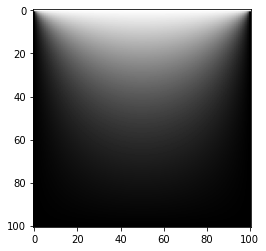

In [1]:
# %load laplace.py
# Newman's laplace.py
from numpy import empty, zeros, max
from pylab import imshow, gray, show

# Constants
M = 100         # Grid squares on a side
V = 1.0         # Voltage at top wall
target = 1e-6   # [V] Target accuracy

# Create arrays to hold potential values
phi = zeros([M+1, M+1], float)
phi[0, :] = V
phiprime = empty([M+1, M+1], float)

# Main loop
delta = 1.0
while delta > target:

    # Calculate new values of the potential
    for i in range(M+1):
        for j in range(M+1):
            if i == 0 or i == M or j == 0 or j == M:
                phiprime[i, j] = phi[i, j]
            else:
                phiprime[i, j] = (phi[i+1, j] + phi[i-1, j]
                                  + phi[i, j+1] + phi[i, j-1])/4

    # Calculate maximum difference from old values
    delta = max(abs(phi-phiprime))

    # Swap the two arrays around
    phi, phiprime = phiprime, phi

# Make a plot
imshow(phi)
gray()
show()

## Overrelaxation method

$$\phi'(x, y) = (1+\omega)\left[\frac{\phi(x+a, y) + \phi(x-a, y) + \phi(x, y+a) + \phi(x, y-a)}4\right] - \omega \phi(x, y).$$
* When it works, it ususally speeds up the calculation.
* Not always stable! How to choose $\omega$ is not always reproducible.
* see Lab \#4 (Newman's exercise 6.11) for a similar problem for finding $f(x)=x$.

## Gauss-Seidel method

* Replace function on the fly as in
$$\phi(x, y) \leftarrow \frac{\phi(x+a, y) + \phi(x-a, y) + \phi(x, y+a) + \phi(x, y-a)}4.$$
* Crucial difference: the LHS is $\phi$, not $\phi'$: we use newer values as they are being computed
* (Jacobi used only old values to compute new one).
* This can be shown to run faster.
* Can be combined with overrelaxation.

The old Jacobi code snippet:

In [ ]:
# Calculate new values of the potential
for i in range(M+1):
    for j in range(M+1):
        if i == 0 or i == M or j == 0 or j == M:
            phiprime[i, j] = phi[i, j]
        else:
            phiprime[i, j] = (phi[i+1, j] + phi[i-1, j]
                              + phi[i, j+1] + phi[i, j-1])/4

becomes:

In [ ]:
# Calculate new values of the potential
for i in range(1, M):  # CHANGE HERE: boundaries never updated
    for j in range(1, M):  # CHANGE HERE
        phi[i, j] = (phi[i+1, j] + phi[i-1, j]  # NO PHIPRIME
                     + phi[i, j+1] + phi[i, j-1])/4

# Parabolic PDEs: FTCS method

* Stands for "Forward Time, Centred Space".
* Consider the 1D heat equation:
$$\frac{\partial T}{\partial t} = \kappa\frac{\partial^2 T}{\partial x^2},$$
* B.Cs.:
    $$T(x=0, t) = T_0, \quad T(x=L, t) = T_L.$$
* I.C.:
    $$T(x, t=0) = T_0 +  (T_L - T_0)\left(\frac{f(x) - f(0)}{f(L) - f(0)}\right)$$

**Step 1: Discretize in space**

$\displaystyle x_m = \frac{m}{M}L = am, \quad m=0\dots{}M, \quad a = \frac{L}M$,

$T_m(t) = \left[T_0(t), \dots{}, T_{M}(t)\right]$

$\displaystyle \left.\frac{\partial^2 T}{\partial x^2}\right|_{x=x_m, t} \approx \frac{T_{m+1} - 2 T_m + T_{m-1}}{a^2}\quad$ ("centred space", CS)

**Step 2: Discretize in time**

$\displaystyle \frac{d T_m}{d t} \approx \kappa\frac{T_{m+1} - 2 T_m + T_{m-1}}{a^2},\quad m = 1 \dots{}, M-1$

Let $t_n = nh$, $h$ the time step.

Let $T_m(t_n) \equiv T_m^n$.

$\displaystyle \Rightarrow \left.\frac{\partial T}{\partial t}\right|_{x=ma, t=nh} \approx \frac{T_{m}^{n+1} - T_m^n}{h} \equiv \kappa\frac{T_{m+1}^n - 2 T_m^n + T_{m-1}^n}{a^2}$ ("Forward (Euler) Time", FT).

$\Rightarrow$ **Explicit FTCS method:**
$$\boxed{T_m^{n+1} = T_m^n + \frac{\kappa h}{a^2}\left(T_{m+1}^n - 2 T_m^n + T_{m-1}^n\right)}.$$

# Intro to stability analysis

## Von Neumann Stability Analysis

* How can we determine stability in PDEs?
* A simple way is to consider a single spatial Fourier mode.
* $T_m^n$ as an inverse DFT:
    $$T_m^n = \sum_k \widehat T_k^n \exp(ikx_m)$$
* If $T_m^n = \widehat T_k^n \exp(ikx_m) = \widehat T_k^n\exp(ikam)$ (one Fourier mode in $x$), and
    $$T_m^{n+1} = T_m^n + \frac{\kappa h}{a^2}\left(T_{m+1}^n - 2 T_m^n + T_{m-1}^n\right)$$
    becomes
    $$\widehat T_k^{n+1}\text e^{ikam} = \left(1 - \frac{2\kappa h }{a^2}\right) \widehat T_k^n\text e^{ikam} + \frac{\kappa h}{a^2}\left(\widehat T_{k}^n\text e^{ika(m+1)} - \widehat T_k^n \text e^{ika(m-1)}\right)$$
    $$\Rightarrow \left|\frac{\widehat T_k^{n+1}}{\widehat T_k^n}\right| = 1 + \frac{\kappa h}{a^2}\left(\text e^{ika} + \text e^{-ika} - 2\right) = \left|1 - \frac{4h\kappa}{a^2}\sin^2\left(\frac{ka}{2}\right)\right|.$$
* This is the growth factor, and it should be less than unity if the solution is not meant to grow, i.e.:
$$\boxed{h \leq \frac{a^2}{2\kappa}}. \qquad\textit{(independent of $k$!)}$$

* FTCS stable for the parabolic equation, provided resolution is adequate ($a\geq \sqrt{2\kappa h}$).

## FTCS for the wave equation

* Reminder: wave equation is hyperbolic,
$$\frac{\partial^2 \phi}{\partial t^2} = c^2\frac{\partial^2 \phi}{\partial x^2},$$
and is subject to suitable boundary and initial conditions.
* Spatially: $\displaystyle \frac{\partial^2 \phi_m}{\partial t^2} \approx \frac{c^2}{a^2}\left(\phi_{m+1}  -2\phi_m + \phi_{m-1}\right), \quad m = 1, \dots{}, M-1$.
* Now transform to pairs of 1st-order ODEs:
$$\frac{d\phi_m}{dt} = \psi_m, \quad \text{and}\quad \frac{d\psi_m}{dt} = \frac{c^2}{a^2}\left(\phi_{m+1} - 2\phi_m + \phi_{m-1}\right)$$
and discretize using forward Euler ($2M$ ODEs).

$$\frac{d\phi_m}{dt} = \psi_m, \quad \text{and}\quad \frac{d\psi_m}{dt} = \frac{c^2}{a^2}\left(\phi_{m+1} - 2\phi_m + \phi_{m-1}\right)$$

Using forward Euler for each:

\begin{align*}
\phi_m^{n+1} & = \phi_m^{n} + h\psi_m^{n},\\
\psi_m^{n+1} & = \psi_m^{n} + h\frac{c^2}{a^2}\left(\phi_{m-1}^{n} + \phi_{m+1}^{n} - 2\phi_m^{n}\right).
\end{align*}
or, equivalently:
$$
\begin{bmatrix}
    \phi_m^{n+1} \\
    \psi_m^{n+1}
\end{bmatrix}
= 
\begin{bmatrix}
    1 & h \\
    -\frac{2hc^2}{a^2} & 1
\end{bmatrix}
\begin{bmatrix}
    \phi_m^{n} \\
    \psi_m^{n}
\end{bmatrix}
+
\begin{bmatrix}
    0 \\
    \frac{c^2 h}{a^2}\left(\phi_{m+1}^n + \phi_{m-1}^n\right)
\end{bmatrix}
$$

Recall $$
\begin{bmatrix}
    \phi_m^{n+1} \\
    \psi_m^{n+1}
\end{bmatrix}
= 
\begin{bmatrix}
    1 & h \\
    -\frac{2hc^2}{a^2} & 1
\end{bmatrix}
\begin{bmatrix}
    \phi_m^{n} \\
    \psi_m^{n}
\end{bmatrix}
+
\begin{bmatrix}
    0 \\
    \frac{c^2 h}{a^2}\left(\phi_{m+1}^n + \phi_{m-1}^n\right)
\end{bmatrix}
$$

Consider a single Fourier mode,
$$
\begin{bmatrix}
    \phi_m^n \\
    \psi_m^n
\end{bmatrix}
= 
\begin{bmatrix}
    \widehat\phi_k^{m} \\
    \widehat\psi_k^{m}
\end{bmatrix}\exp(ikma)
$$
and we obtain, after some algebra
$$
\begin{bmatrix}
    \widehat\phi_k^{m+1} \\
    \widehat\psi_k^{m+1}
\end{bmatrix}
=
\mathbf A \begin{bmatrix}
    \widehat\phi_k^{m} \\
    \widehat\psi_k^{m}
\end{bmatrix}\exp(ikma),$$
$$
\text{with}\quad \mathbf A = 
\begin{bmatrix}
    1 & h \\
    -hr^2 & 1
\end{bmatrix}\quad \text{and}\quad
r^2 = \frac{2c}{a}\sin\frac{ka}{2},
$$
which **does** depend on $k$.

$$
\begin{bmatrix}
    \widehat\phi_k^{m+1} \\
    \widehat\psi_k^{m+1}
\end{bmatrix}
=
\mathbf A \begin{bmatrix}
    \widehat\phi_k^{m} \\
    \widehat\psi_k^{m}
\end{bmatrix}\exp(ikma),$$
$$\text{with}\quad \mathbf A = 
\begin{bmatrix}
    1 & h \\
    -hr^2 & 1
\end{bmatrix}\quad \text{and}\quad
r = \frac{2c}{a}\sin\frac{ka}{2}.
$$

* Eigenvalues of $\mathbf A$ are $\lambda_\pm = 1\pm ihr$,
* therefore, $|\lambda_\pm|^2 = 1 + h^2 r^2 \geq 1$.
* Define corresponding eigenvectors $\mathbf V_\pm$, suppose initial condition is $\alpha_+\mathbf V_+ + \alpha_- \mathbf V_-$.
* After $p$ time steps, this becomes $\alpha_+\lambda_+^p \mathbf V_+ + \alpha_- \lambda_-^p \mathbf V_-$, which will grow without bounds!

**$\Rightarrow$ FTCS always unstable for the wave equation!**

# Summary

* 2nd-order PDEs can be elliptical, parabolic, hyperbolic.
* Elliptical equations (e.g., Poisson eqn.):
    * Jacobi relaxation (always stable),
    * Speed-up with overrelaxation (not always stable),
    * Gauss-Seidel (overrelaxed or not): replace on the fly; more stable than Jacobi when overrelaxing.
* Parabolic PDEs (e.g., heat eqn):
    * FTCS (Forward Time, Centred Space) scheme: centred finite-diff. in space, forward Euler in time
    * Von Neumann analysis says stable if sufficient resolution space.
* Hyperbolic PDEs (e.g., wave eqn.):
    * Von Neumann analysis says FTCS never stable.
    * See next week for better schemes.
* Von Neumann stability analysis: plug a Fourier mode, see if it grows or not.